In [2]:
install.packages("igraph")
library('igraph')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
install.packages("pracma")
library('pracma')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library('Matrix')


Attaching package: ‘Matrix’


The following objects are masked from ‘package:pracma’:

    expm, lu, tril, triu




In [0]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    #adj = as.matrix(adj)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

a)

In [0]:
random_walk = function (g, num_steps, teleport = FALSE, alpha = 0.15){

    transition_matrix = create_transition_matrix(g)

    start_node=1 
      for(i in 1:num_steps){
      PMF = transition_matrix[start_node, ]
      if(teleport == TRUE) {
           PMF = (1-alpha) * PMF + alpha/vcount(g)
           #print(teleport)
        }
      next_node = sample(1:vcount(g), 1, prob = PMF)
      start_node=next_node
      }
    return(next_node)
}

In [0]:
g1 <-  sample_pa(1000, m=4, directed=T)
g2 <-  sample_pa(1000, m=4, directed=T)
g_permute <-  permute(g2, sample(vcount(g2)))
g_permute_edges = t(as_edgelist(g_permute,names=FALSE))
g3 <- add_edges(g1,as.vector(g_permute_edges))


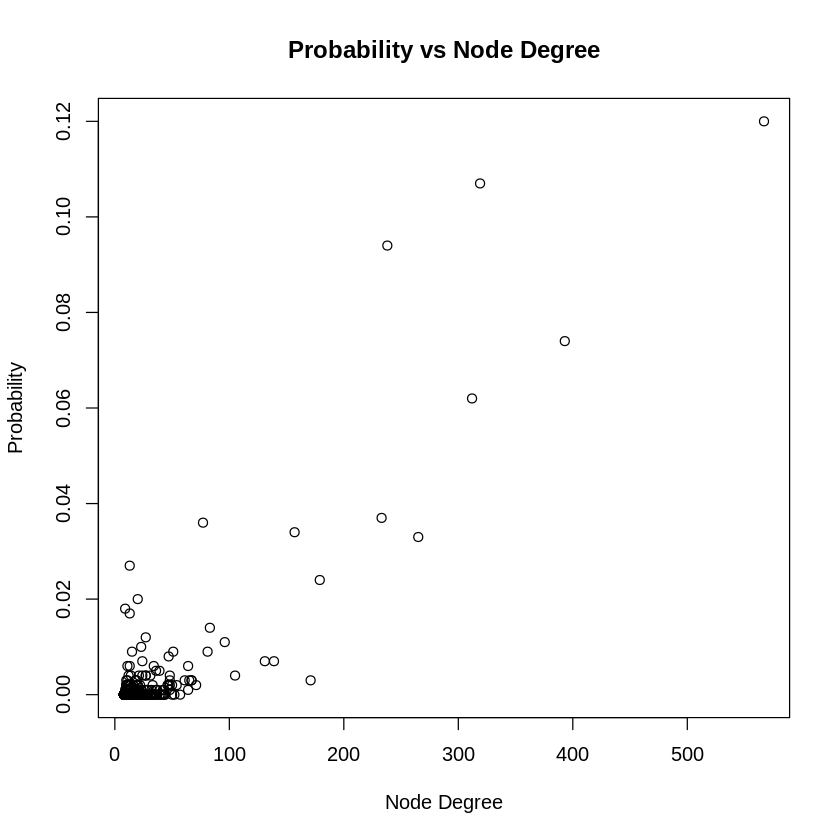

In [9]:
freq=numeric(vcount(g3))
iter = 1000
steps = 1000
for (i in 1:iter) {
    last_node = random_walk(g3, steps,teleport= FALSE)
    #cat("last node is: ", last_node)
    freq[last_node] = freq[last_node] + 1
    
}
proba = freq / iter
plot(degree(g3), proba, main="Probability vs Node Degree",xlab="Node Degree",ylab="Probability")

In [10]:
setEPS()
postscript("2_3_a.eps")
plot(degree(g3), proba, main="Probability vs Node Degree",xlab="Node Degree",ylab="Probability")
dev.off()

png 
  2

b)

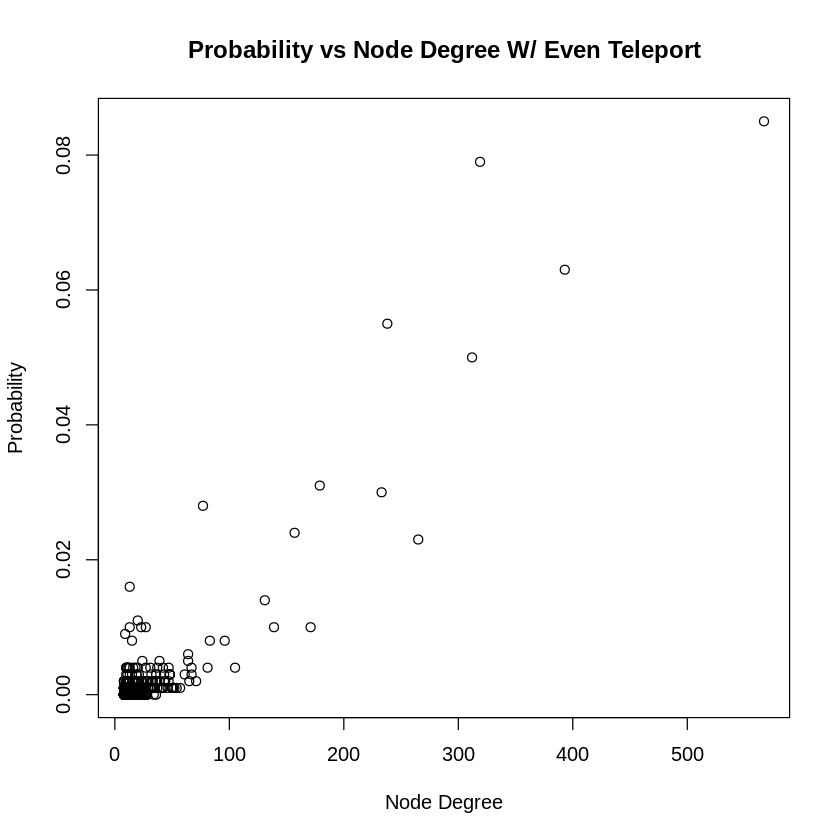

In [11]:
freq=numeric(vcount(g3))
iter = 1000
steps = 1000
for (i in 1:iter) {
    last_node = random_walk(g3, steps, teleport = TRUE, alpha = 0.15)
    #cat("last node is: ", last_node)
    freq[last_node] = freq[last_node] + 1
    
}
probb = freq / iter
plot(degree(g3), probb, main="Probability vs Node Degree W/ Even Teleport",xlab="Node Degree",ylab="Probability")

In [12]:
setEPS()
postscript("2_3_b.eps")
plot(degree(g3), probb, main="Probability vs Node Degree W/ Even Teleport",xlab="Node Degree",ylab="Probability")
dev.off()

png 
  2

4.a)

In [0]:
random_walk_pagerank = function (g, num_steps, alpha = 0.15,pr){

    transition_matrix = create_transition_matrix(g)

    start_node=1 
      for(i in 1:num_steps){
      PMF = transition_matrix[start_node, ]
      PMF = (1-alpha) * PMF + alpha*pr
      next_node = sample(1:vcount(g), 1, prob = PMF)
      start_node=next_node
      }
    return(next_node)
}

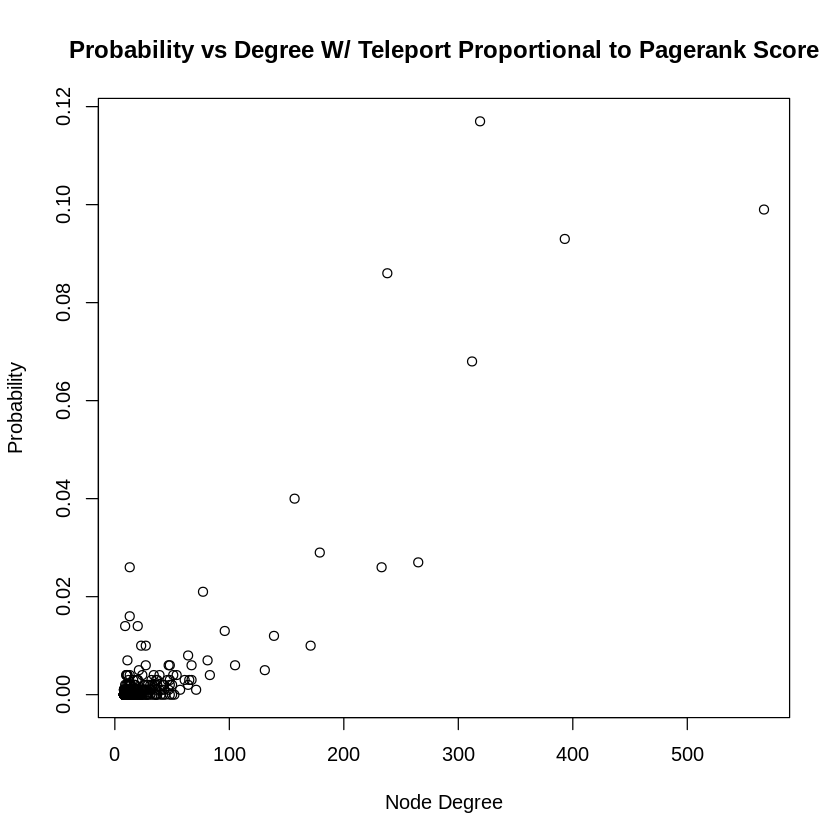

In [14]:
freq=numeric(vcount(g3))
iter = 1000
steps = 1000
pr = page_rank(g3)$vector

for (i in 1:iter) {
    last_node = random_walk_pagerank(g3, steps, alpha = 0.15,pr)
    #cat("last node is: ", last_node)
    freq[last_node] = freq[last_node] + 1
    
}
probc = freq / iter
plot(degree(g3), probc, main="Probability vs Degree W/ Teleport Proportional to Pagerank Score",xlab="Node Degree",ylab="Probability")

In [15]:
setEPS()
postscript("2_4_a.eps")
plot(degree(g3), probc, main="Probability vs Degree W/ Teleport Proportional to Pagerank Score",xlab="Node Degree",ylab="Probability")
dev.off()

png 
  2

b)

In [0]:
random_walk_median = function (g, num_steps, alpha = 0.15,median_prob){

    transition_matrix = create_transition_matrix(g)

    start_node=1 
      for(i in 1:num_steps){
      PMF = transition_matrix[start_node, ] 
      PMF = (1-alpha) * PMF + alpha*median_prob
      #print(teleport)

      next_node = sample(1:vcount(g), 1, prob = PMF)
      start_node=next_node
      }
    return(next_node)
}

The first Median Node is:  870
The degree of the first Median Node is:  10
The second Median Node is:  642
The degree of the second Median Node is:  10

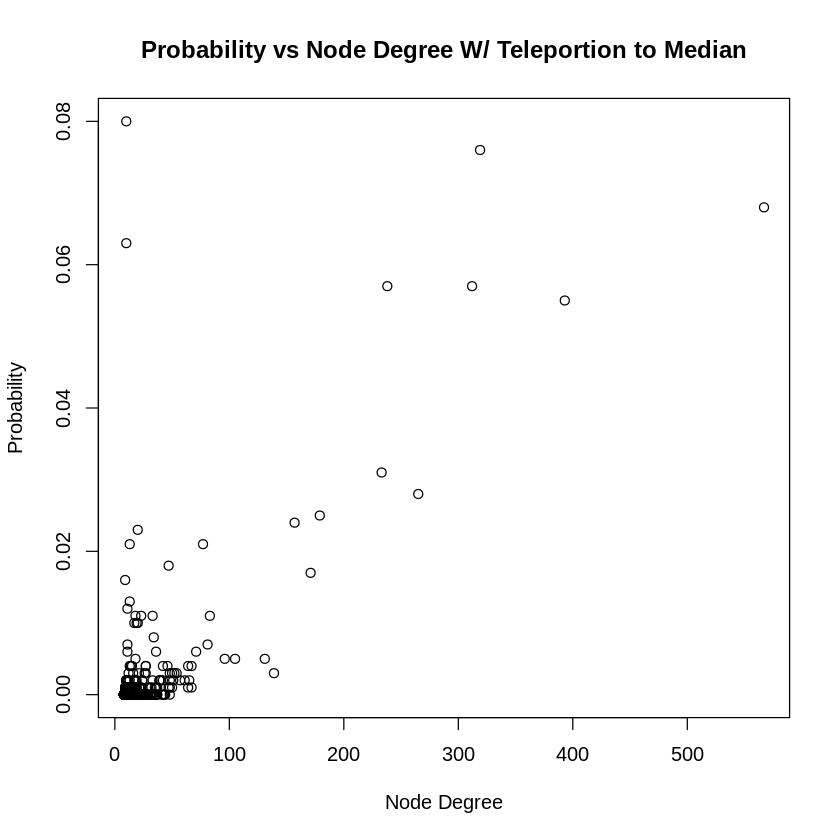

In [17]:
freq=numeric(vcount(g3))
iter = 1000
steps = 1000

ix <- sort(page_rank(g3)$vector, index.return=TRUE)$ix
median1 = ix[vcount(g3)/2]
cat("The first Median Node is: ", median1)
cat("\nThe degree of the first Median Node is: ", degree(g3)[median1])

median2 = ix[vcount(g3)/2+1]
cat("\nThe second Median Node is: ", median2)
cat("\nThe degree of the second Median Node is: ", degree(g3)[median2])
median_prob = numeric(vcount(g3))
median_prob[median1] = 0.5
median_prob[median2] = 0.5

for (i in 1:iter) {
    last_node = random_walk_median(g3, steps, alpha = 0.15,median_prob)
    #cat("last node is: ", last_node)
    freq[last_node] = freq[last_node] + 1
    
}
probd = freq / iter
plot(degree(g3), probd, main="Probability vs Node Degree W/ Teleportion to Median",xlab="Node Degree",ylab="Probability")

In [18]:
setEPS()
postscript("2_4_b.eps")
plot(degree(g3), probd, main="Probability vs Node Degree W/ Teleportion to Median",xlab="Node Degree",ylab="Probability")
dev.off()

png 
  2